In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from termcolor import colored
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import csv
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from  sklearn.cluster import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA


from sklearn.cluster import KMeans
from  sklearn.cluster import BisectingKMeans
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score, homogeneity_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from  sklearn.mixture import GaussianMixture


In [2]:

X= pd.read_csv('../Analiza podataka/X_preprocessed1.csv')
y=  pd.read_csv('../Analiza podataka/Y_preprocessed1.csv')
feature_names = X.columns
y=y['stroke']

In [3]:
def clustering_accuracy(real, predicted):
    total = len(real)
    correct = sum(a == b for a, b in zip(real, predicted))
    score = (correct / total) * 100
    return score
clustering_acc=[]

In [4]:
normalScaler = StandardScaler()
normalScaler.fit(X)
StandardScaler()

X_normalized = pd.DataFrame(normalScaler.transform(X))
clustering_a=[]

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_normalized)


In [6]:
X_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

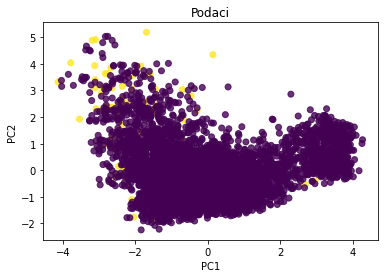

In [7]:
plt.scatter(X_pca['PC1'], X_pca['PC2'],c=y,label=y,alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Podaci")
plt.show()


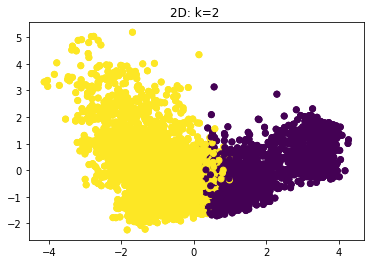

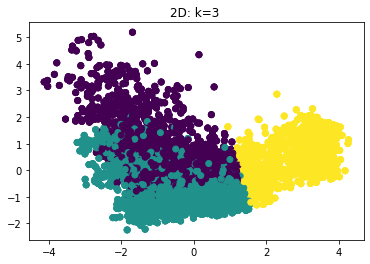

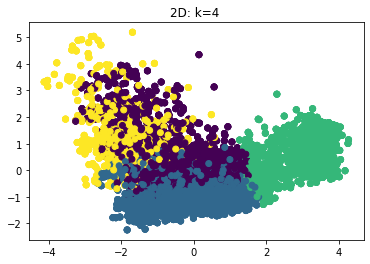

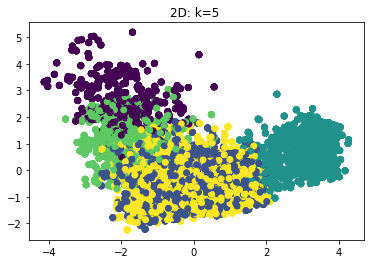

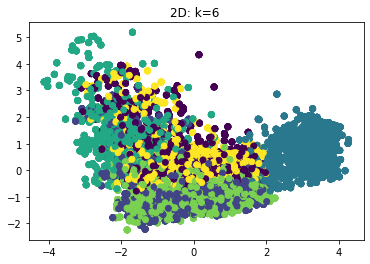

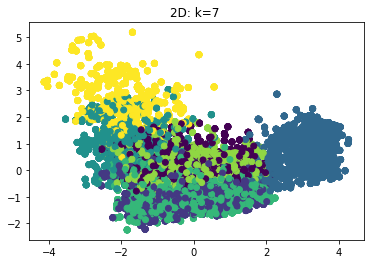

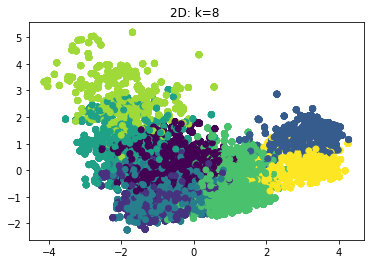

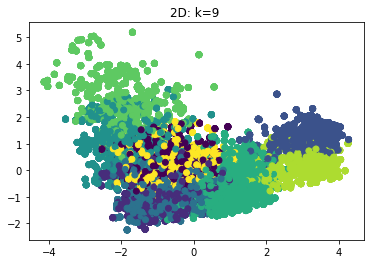

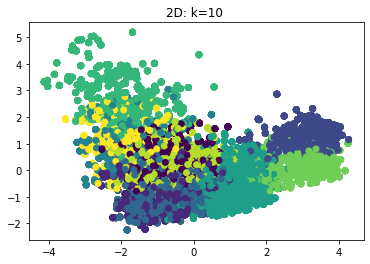

In [8]:
silhouettes = []
sse_scores = []
inertia= []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i,random_state=48,  init='k-means++', n_init='auto', max_iter=500)
    kmeans.fit(X_normalized)
    labels = kmeans.predict(X_normalized)
    for j in range (i):
        plt.title(f'2D: k={i} ')  
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X_normalized, labels))
    sse_scores.append(round(kmeans.inertia_, 4))
    plt.show()

Text(0.5, 1.0, 'Silueta za razlicite k')

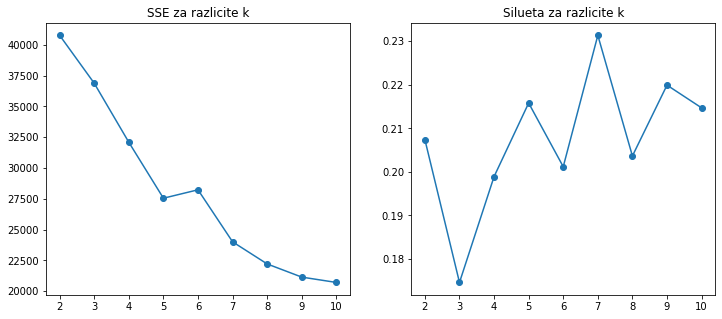

In [9]:
fig = plt.figure(figsize=(12, 5))

x = [f'{i}' for i in range(2,11)]

fig.add_subplot(1, 2, 1)
y1 = sse_scores
plt.plot(x, y1, marker='o')
plt.title('SSE za razlicite k')

fig.add_subplot(1, 2, 2)
y2 = silhouettes
plt.plot(x, y2, marker='o')
plt.title('Silueta za razlicite k')

In [10]:
km1 = KMeans(n_clusters=2, max_iter=500, init='k-means++' ,n_init= 'auto',random_state=48)
km1.fit(X_normalized)

KMeans(max_iter=500, n_clusters=2, n_init='auto', random_state=48)

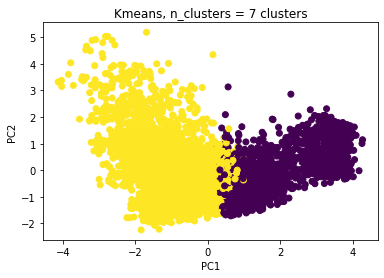

In [11]:
X_pca['labels']= km1.labels_
scatter = plt.scatter(X_pca["PC1"], X_pca["PC2"],c=km1.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('{} clusters'.format("Kmeans, n_clusters = 7"))
plt.show()

In [12]:
clustering_accuracy(y,km1.labels_)

34.06464250734574

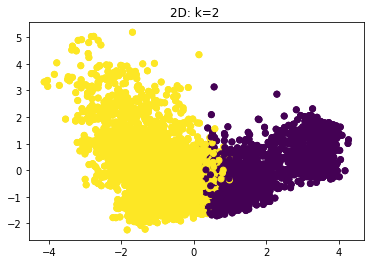

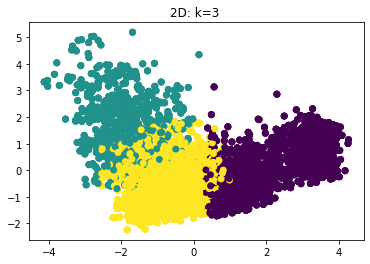

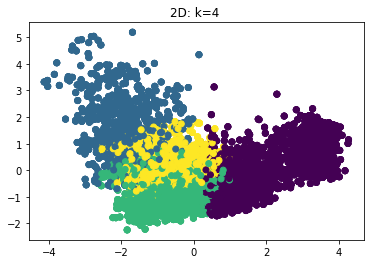

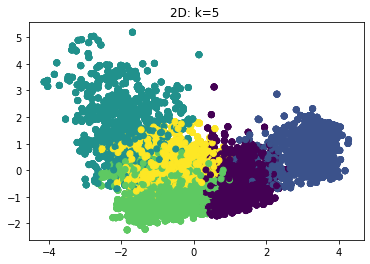

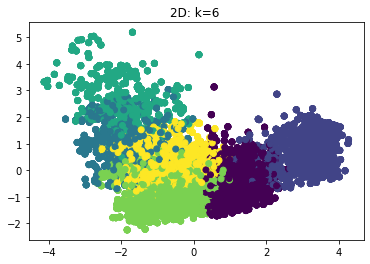

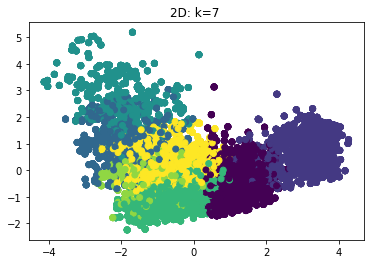

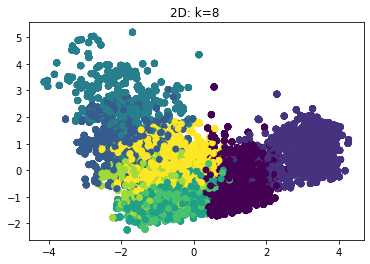

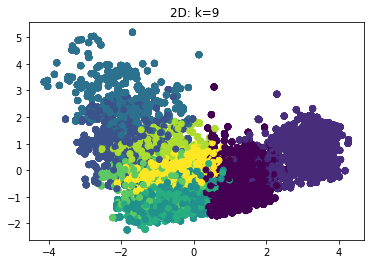

In [13]:
silhouettes = []
sse_scores = []
for i in range(2, 10):
    bkmeans = BisectingKMeans(n_clusters=i,  bisecting_strategy='biggest_inertia', random_state=48,init='k-means++')
    bkmeans.fit(X_normalized)
    labels = bkmeans.predict(X_normalized)
    for j in range (i):
        plt.title(f'2D: k={i} ')  
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X_normalized, labels))
    sse_scores.append(round(bkmeans.inertia_, 4))
    plt.show()
    
  

Text(0.5, 1.0, 'Silueta za razlicite k')

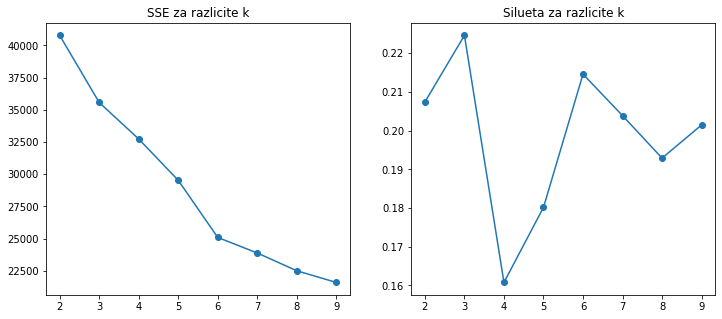

In [14]:
fig = plt.figure(figsize=(12, 5))

x = [f'{i}' for i in range(2,10)]

fig.add_subplot(1, 2, 1)
y1 = sse_scores
plt.plot(x, y1, marker='o')
plt.title('SSE za razlicite k')

fig.add_subplot(1, 2, 2)
y2 = silhouettes
plt.plot(x, y2, marker='o')
plt.title('Silueta za razlicite k')

In [15]:
km2 =  BisectingKMeans(n_clusters=2,  bisecting_strategy='biggest_inertia', random_state=48,init='k-means++')
km2.fit(X_normalized)

BisectingKMeans(init='k-means++', n_clusters=2, random_state=48)

In [16]:
clustering_accuracy(y,km2.labels_)

34.06464250734574

Text(0, 0.5, 'Silhouette score')

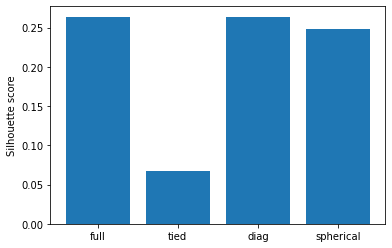

In [17]:
covariances = ['full', 'tied', 'diag', 'spherical']
silhouettes_cov = []

for covariance in covariances:
    gauss = GaussianMixture(n_components=2, covariance_type=covariance, random_state=48,init_params='k-means++')
    gauss.fit(X_normalized)
    labels = gauss.predict(X_normalized)

    silhouettes_cov.append(silhouette_score(X_normalized, labels))
plt.bar(covariances, silhouettes_cov)
plt.ylabel('Silhouette score')

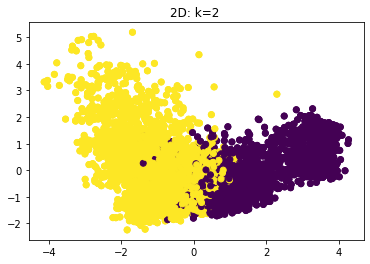

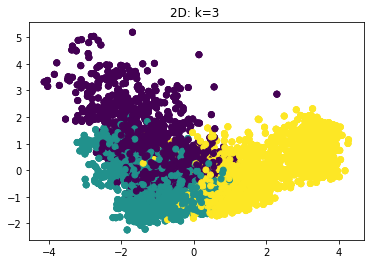

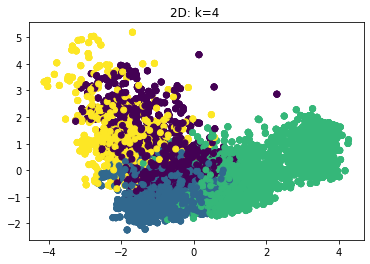

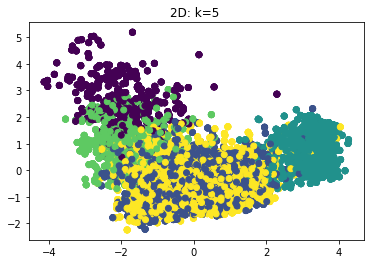

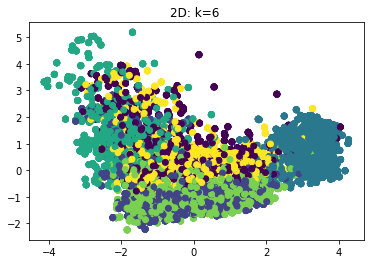

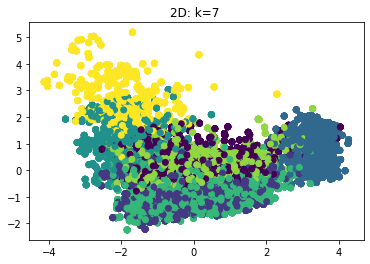

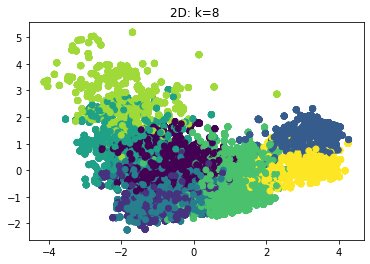

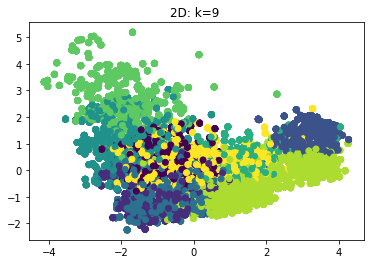

In [18]:
silhouettes = []
for i in range(2, 10):
    gmm = GaussianMixture(n_components = i,random_state=48, covariance_type='diag')
    gmm.fit(X_normalized)
    labels = gmm.predict(X_normalized)
    for j in range (i):
        plt.title(f'2D: k={i} ')  
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X_normalized, labels))
    plt.show()

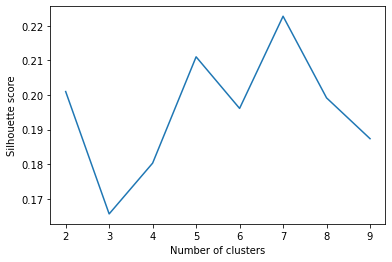

In [19]:
plt.plot(range(2, 10), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [20]:
gausmodel = GaussianMixture(n_components = 2,covariance_type='full',random_state=48)
gausmodel.fit(X_normalized)
labels = gausmodel.predict(X_normalized)

In [21]:
clustering_accuracy(y,labels)

37.19882468168462

In [22]:
gausmodel1 = GaussianMixture(n_components = 2,covariance_type='tied',random_state=48)
gausmodel1.fit(X_normalized)
labels = gausmodel1.predict(X_normalized)

In [23]:
clustering_accuracy(y,labels)

38.09990205680705

In [24]:
gausmodel2 = GaussianMixture(n_components = 2,covariance_type='diag',random_state=48)
gausmodel2.fit(X_normalized)
labels = gausmodel2.predict(X_normalized)

In [25]:
clustering_accuracy(y,labels)

37.19882468168462

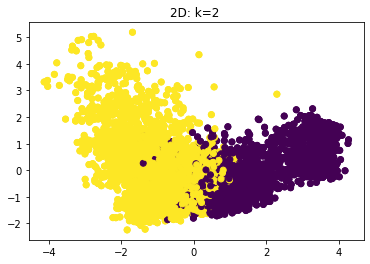

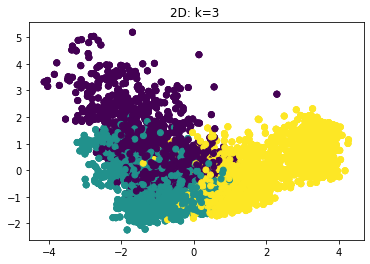

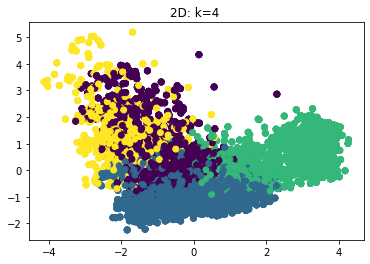

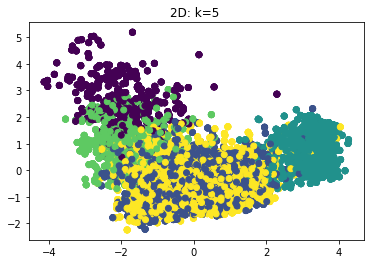

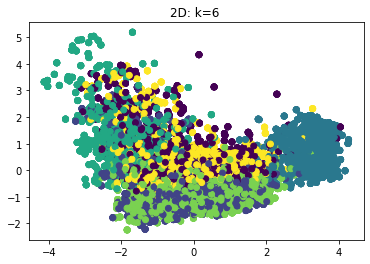

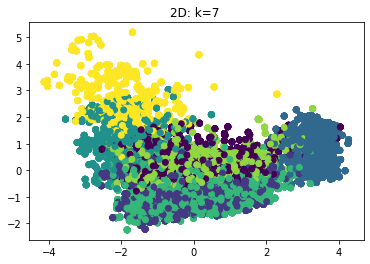

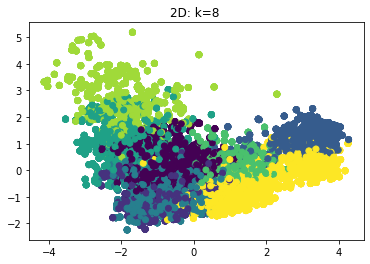

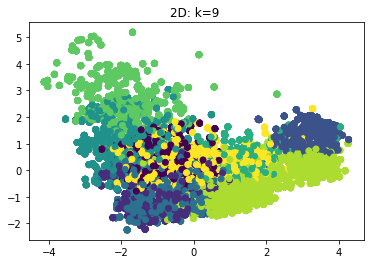

In [26]:
silhouettes = []
for i in range(2, 10):
    gmm = GaussianMixture(n_components = i,random_state=48, covariance_type='full')
    gmm.fit(X_normalized)
    labels = gmm.predict(X_normalized)
    for j in range (i):
        plt.title(f'2D: k={i} ')  
        plt.scatter(X_pca["PC1"], X_pca["PC2"], c=labels)
    silhouettes.append(silhouette_score(X_normalized, labels))
    plt.show()

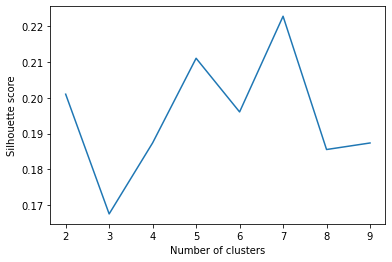

In [27]:
plt.plot(range(2, 10), silhouettes)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()